### Simple Logistic Regression on diabetes dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("pima-indians-diabetes.csv")
df.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [3]:
df.columns = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi',
             'pedigree', 'age', 'label']

In [4]:
df.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [5]:
feature_cols = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi',
             'pedigree', 'age']
x = df[feature_cols]
y = df['label']

In [6]:
x

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age
0,1,85,66,29,0,26.6,0.351,31
1,8,183,64,0,0,23.3,0.672,32
2,1,89,66,23,94,28.1,0.167,21
3,0,137,40,35,168,43.1,2.288,33
4,5,116,74,0,0,25.6,0.201,30
...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63
763,2,122,70,27,0,36.8,0.340,27
764,5,121,72,23,112,26.2,0.245,30
765,1,126,60,0,0,30.1,0.349,47


In [7]:
y

0      0
1      1
2      0
3      1
4      0
      ..
762    0
763    0
764    0
765    1
766    0
Name: label, Length: 767, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size =.2,
                                                    random_state = 45)
X_train.count()

pregnant    613
glucose     613
bp          613
skin        613
insulin     613
bmi         613
pedigree    613
age         613
dtype: int64

In [9]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter = 1000, random_state = 0) 
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [10]:
y_pred = classifier.predict(X_test)

In [11]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0],
      dtype=int64)

In [12]:
y_test

195    0
51     0
66     0
437    0
664    0
      ..
246    0
556    0
298    0
339    0
146    0
Name: label, Length: 154, dtype: int64

In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[93, 10],
       [22, 29]], dtype=int64)

In [14]:
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7922077922077922

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       103
           1       0.74      0.57      0.64        51

    accuracy                           0.79       154
   macro avg       0.78      0.74      0.75       154
weighted avg       0.79      0.79      0.78       154



<AxesSubplot:>

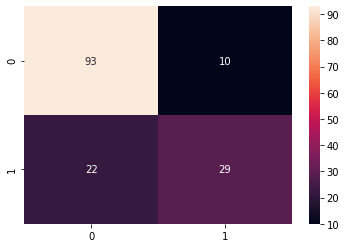

In [16]:
import seaborn as sns
sns.heatmap(cm, annot=True)